#### This is a growing tutorial demonstrates some MATLAB examples and their equivalent code in Python
##### Each Matlab block function corresponds a block in conversion.ipynb, i.e., the block heading start with "block_"
##### written by Richard Xu (yida.xu@uts.edu.au)
##### Feb 2018

# block_read_csv

In [13]:
import pandas as pd
import numpy as np
import time

store = pd.read_excel('superstore.xls');

# print the first row
print store[:1]

# ---------------------------------------------------------------
# The task is to compute the total profits that a customer made
# ---------------------------------------------------------------


# --------------------------------------------------------------
# METHOD 1: insert element by element into DataFrame
# --------------------------------------------------------------

t1 = time.time()

val = pd.unique(store['Customer ID'])

# in-place function, i.e., the val changes its values internally
val.sort()

profit_1 = pd.DataFrame(columns = ['Customer ID', 'Profit' ] )

i = 0

for v in val:
    #cus_list = store[store['Customer ID'].str.contains(v,na=False)]
    index = store['Customer ID']==v
    
    p_series = store[index].Profit
    
    #print type(profit_series), type(profit_series.values)    
    
    profit_1.loc[i] = [v, p_series.values.sum()]
    
    i = i + 1

print profit_1[:5]
print "time times = %0.3f" % (time.time() - t1)


# get that Series into array
print type(store['Profit']), type(store['Profit'].values)

print '\n'


# --------------------------------------------------------------
# METHOD 2: construct array first, then put into DataFrame
# --------------------------------------------------------------

t1 = time.time()

val = pd.unique(store['Customer ID'])
val.sort()

profit = np.zeros(len(val))
customer_ID = []

i = 0

for v in val:
    index = store['Customer ID']==v
    p_series = store[index].Profit
    customer_ID.append(v)
    profit[i] = sum(p_series)
    i = i + 1

    
profit_2 = pd.DataFrame(columns = ['customer ID', 'Profit' ] )
profit_2['customer ID'] = customer_ID
profit_2['Profit'] = profit

   
print profit_2[:5]

print "time times = %0.3f" % (time.time() - t1)


print '\n'


# --------------------------------------------------------------
# METHOD 3: use groupby => get Series 
# instead of DataFrame, Series has a (key, value) pair like Dictionary
# --------------------------------------------------------------

t1 = time.time()

profit_3 = store.groupby('Customer ID', sort=True).Profit.sum()
   
print profit_3[:5]
print "time times = %0.3f" % (time.time() - t1)




   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City   ...    Postal Code  \
0   Claire Gute  Consumer  United States  Henderson   ...          42420   

   Region       Product ID   Category Sub-Category  \
0   South  FUR-BO-10001798  Furniture    Bookcases   

                        Product Name   Sales  Quantity  Discount   Profit  
0  Bush Somerset Collection Bookcase  261.96         2       0.0  41.9136  

[1 rows x 21 columns]
  Customer ID     Profit
0    AA-10315   103.5146
1    AA-10375    69.6989
2    AA-10480    15.3288
3    AB-10060  1461.5343
4    AB-10105  -204.4458
time times = 1.347
<class 'pandas.core.series.Series'> <type 'numpy.ndarray'>


  customer ID     Profit
0    AA-10315   103.5146
1    AA-10375    69.6989
2    AA-10480    15.3288
3    AB-10060  1461.5343
4    AB-10105  -204.4458
time times = 0.422


Custome

# block_numpy_multiply

In [2]:
import numpy as np

A = [[3, 4],[2, 5]]
B = [[5, 6],[3, 2]]
C = [[7, 2],[1, 5]]


# before cast them to numpy types, they are type "list" 
print "type (A) = ", type (A)


# these are matrix multipications

print "np.dot(A,B) = \n", np.dot(A,B)
print "np.matmul(A,B) = \n", np.matmul(A,B)

# to make "np.dot" to take more than two inputs:
print "reduce(np.dot, [A, B, C]) = \n", reduce(np.dot, [A, B, C])


# after cast them to numpy types, they are type "ndarray'" 

A = np.array(A)
B = np.array(B)

print "type (A) = ", type (A)

# the following does element-wise 
print "np.multiply(A,B) = \n", np.multiply(A,B)

# then you can perform things such as element-wise multipication:
print " A * B * C = \n",  A * B * C


# then we cast them into matrix

A = np.mat(A)
B = np.mat(B)
C = np.mat(C)

print "type (A) = ", type (A)

W2 = A * B * C

print " A * B * C = \n",  A * B * C

type (A) =  <type 'list'>
np.dot(A,B) = 
[[27 26]
 [25 22]]
np.matmul(A,B) = 
[[27 26]
 [25 22]]
reduce(np.dot, [A, B, C]) = 
[[215 184]
 [197 160]]
type (A) =  <type 'numpy.ndarray'>
np.multiply(A,B) = 
[[15 24]
 [ 6 10]]
 A * B * C = 
[[105  48]
 [  6  50]]
type (A) =  <class 'numpy.matrixlib.defmatrix.matrix'>
 A * B * C = 
[[215 184]
 [197 160]]


# block_matrix_find

In [3]:
## hello

a_list = [[ 8, 1, 6], [3, 5, 7], [4, 9, 2]]
print a_list,"\n"
print type(a_list), a_list > 5, "\n"

a_list = np.array(a_list)
print a_list,"\n"

print type(a_list), "\n"

# should see a matrix of True and False
print a_list > 5, "\n"

print "a_list[2,1] = ", a_list[2,1], "\n"
print "a_list[2,:] = ", a_list[2,:], "\n"
print "a_list[:,1] = ", a_list[:,1], "\n"

# this will return two arrays indicating the row and column element, equivlent to "find" in MATLAB
print "np.where( a_list > 5 ) \n", np.where( a_list > 5 )

print "np.argwhere(a_list > 5) =\n", np.argwhere(a_list > 5)
print "a_list[np.where( a_list > 5 )] = ", a_list[np.where( a_list > 5 )]

print "a_list[a_list > 5] = ", a_list[a_list > 5]

[[8, 1, 6], [3, 5, 7], [4, 9, 2]] 

<type 'list'> True 

[[8 1 6]
 [3 5 7]
 [4 9 2]] 

<type 'numpy.ndarray'> 

[[ True False  True]
 [False False  True]
 [False  True False]] 

a_list[2,1] =  9 

a_list[2,:] =  [4 9 2] 

a_list[:,1] =  [1 5 9] 

np.where( a_list > 5 ) 
(array([0, 0, 1, 2]), array([0, 2, 2, 1]))
np.argwhere(a_list > 5) =
[[0 0]
 [0 2]
 [1 2]
 [2 1]]
a_list[np.where( a_list > 5 )] =  [8 6 7 9]
a_list[a_list > 5] =  [8 6 7 9]


# block_numpy_reshape_repeat

In [4]:
import numpy as np

a_list = [[16, 2, 3, 13], [5, 11, 10, 8], [9, 7, 6, 12] ,[4, 14, 15, 1]]
print a_list,"\n"

b_list = np.reshape(a_list,[2,8])
print b_list, "\n"

b_list = np.reshape(a_list,[8,2])
print b_list, "\n"

b_list = np.reshape(np.transpose(a_list),[8,2])
print b_list, "\n"

b_list = np.reshape(np.transpose(a_list),[1,-1])
print b_list, "\n"


'''  to get   [ 1 2 
                1 2 
                1 2 
                1 2] '''

print "np.repeat(np.mat([1, 2]), 4,0) = \n", np.repeat(np.mat([1, 2]), 4,0)

# to get [1 1 1 1 2 2 2 2]
print "np.repeat(np.mat([1, 2]), 4,0) = \n", np.repeat(np.mat([1, 2]), 4,1)


# --------------------------------------------------------------------------
# Exercise: how to get [1 2 1 2 1 2 1 2]:
# --------------------------------------------------------------------------
answer = np.reshape(np.repeat(np.mat([1, 2]), 4,0),[1,-1])

[[16, 2, 3, 13], [5, 11, 10, 8], [9, 7, 6, 12], [4, 14, 15, 1]] 

[[16  2  3 13  5 11 10  8]
 [ 9  7  6 12  4 14 15  1]] 

[[16  2]
 [ 3 13]
 [ 5 11]
 [10  8]
 [ 9  7]
 [ 6 12]
 [ 4 14]
 [15  1]] 

[[16  5]
 [ 9  4]
 [ 2 11]
 [ 7 14]
 [ 3 10]
 [ 6 15]
 [13  8]
 [12  1]] 

[[16  5  9  4  2 11  7 14  3 10  6 15 13  8 12  1]] 

np.repeat(np.mat([1, 2]), 4,0) = 
[[1 2]
 [1 2]
 [1 2]
 [1 2]]
np.repeat(np.mat([1, 2]), 4,0) = 
[[1 1 1 1 2 2 2 2]]


# block_numpy_unique

In [5]:
a_list = np.random.rand(5,5) * 5 + 10
a_list = np.floor(a_list)

print a_list,"\n"

print np.unique(a_list), "\n"

val, indices, inv_indices, counts = np.unique(a_list, return_index = True, return_inverse = True, return_counts = True)

print indices, inv_indices, counts,"\n"
one_a_list = a_list.flatten()
print one_a_list[indices],"\n"

for v in val:
    print one_a_list[np.where( one_a_list == v )]


[[13. 13. 12. 12. 13.]
 [12. 10. 12. 10. 12.]
 [13. 10. 14. 10. 11.]
 [11. 11. 14. 10. 14.]
 [12. 11. 11. 11. 10.]] 

[10. 11. 12. 13. 14.] 

[ 6 14  2  0 12] [3 3 2 2 3 2 0 2 0 2 3 0 4 0 1 1 1 4 0 4 2 1 1 1 0] [6 6 6 4 3] 

[10. 11. 12. 13. 14.] 

[10. 10. 10. 10. 10. 10.]
[11. 11. 11. 11. 11. 11.]
[12. 12. 12. 12. 12. 12.]
[13. 13. 13. 13.]
[14. 14. 14.]


# block_direction_plot

3.11780049709 

[[3.1 7. ]
 [1.2 2.4]
 [1.  1.8]
 [2.5 5.2]] 

1.0 

[1.  1.8] 



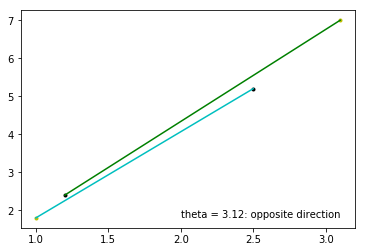

In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

#A = np.array([[1.2, 2.4], [3.1, 7.0]]);
A = np.array([[3.1, 7.0], [1.2, 2.4]]);
B = np.array([[1.0, 1.8], [2.5, 5.2]]);


plt.plot( A[0,0], A[0,1], 'bo', markersize=3, color='y')
plt.plot( A[1,0], A[1,1], 'bo', markersize=3, color='k')
plt.plot( A[:,0], A[:,1], color='g')


plt.plot( B[0,0], B[0,1], 'bo', markersize=3, color='y')
plt.plot( B[1,0], B[1,1], 'bo', markersize=3, color='k')
plt.plot( B[:,0], B[:,1], color='c')

A_dir = A[1,:] - A[0,:];
A_dir = A_dir / np.linalg.norm(A_dir);

B_dir = B[1,:] - B[0,:];
B_dir = B_dir / np.linalg.norm(B_dir);

theta = math.acos(np.dot(A_dir,B_dir))

print theta,"\n"

text_m = np.append(A,B,axis=0)

print text_m,"\n"

print np.amin(text_m), "\n"

text_min = np.amin(text_m, axis=0)

print text_min, "\n"


# the following are equivalent, except the latter cap only to two decimal points
# plt.text(text_min[0]+1,text_min[1], "theta = " + str(theta) + ": same direction" ); 

if abs(theta)< 0.2:
    plt.text(text_min[0]+1,text_min[1], "theta = " + "%0.2f" % theta + ": same direction" )
    
if abs(theta) > math.pi - 0.2:
    plt.text(text_min[0]+1,text_min[1], "theta = " + "%0.2f" % theta + ": opposite direction" ); 

plt.show()


# block_inline_function

In [7]:
def sigmoid_func(x): 
    return 1/(1 + math.exp(-x))

print sigmoid_func(2)

sigmoid2 = lambda x: 1/(1 + math.exp(-x))

print sigmoid2(2)

0.880797077978
0.880797077978


# block_map_reduce

In [8]:
items = range(-2,3)

# without using MAP function
sigmoids = []
for i in items:
    sigmoids.append(sigmoid2(i))


print items, sigmoids

# using MAP function

# both does the same thing of the above
sigmoids2 = map(lambda x: 1/(1 + math.exp(-x)), items)
sigmoids2 = map(lambda x: sigmoid_func(x), items)

print sigmoids2


# without using REDUCE function 
prod = 1
for i in sigmoids2:
    prod = prod * i

print prod

# with using REDUCE function
prod2 = reduce((lambda x, y: x * y), sigmoids2)

print prod2


# now apply a filter to input before REDUCE
prod3 = reduce((lambda x, y: x * y), filter(lambda x: x >= 0.2, sigmoids2))

print prod3


[-2, -1, 0, 1, 2] [0.11920292202211755, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823]
[0.11920292202211755, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823]
0.0103214959021
0.0103214959021
0.0865876081473


### non-MATLAB tutorial: dictionary example

In [9]:
# dictionary isn't used in MATLAB, but a useful tool in Python
skill = {"package" : "tensorflow", "experience": 2.5, "language": "python", "deep_learning": True}
print skill, type(skill)

skill["package"] = "keras"

# note that dictionary isn't indexed sequentially, so print skill[0] doens't work:
print skill

# -------- hierarchical access: -------------
job = {"required": "package", "optional": "langauge"}

print skill[job["required"]]

print 'len(skill) = ', len(skill)

print '"language" in skill = ', "language" in skill
del skill["language"]


print '"language" not in skill = ', "language" not in skill


# -------- use d.pudate() instead of d.add() function -

skill.update({'programming': "python"})
print skill


# --------  the followings are the same ---------------

print('\nfor key in skill:\n')

for key in skill:
    print key

print('\nfor key in skill.iterkeys():\n')
    
for key in skill.iterkeys():
    print key
    
# --------  the followings are the same ---------------
    
print('\nfor val in skill.itervalues():\n')

for val in skill.itervalues():
    print val

print('for key in skill:\n')
    
for key in skill:
    print skill[key]

# --------  use something like ---------------

print('\n')

for key in skill:
    print key, " ", skill[key]



{'deep_learning': True, 'language': 'python', 'experience': 2.5, 'package': 'tensorflow'} <type 'dict'>
{'deep_learning': True, 'language': 'python', 'experience': 2.5, 'package': 'keras'}
keras
len(skill) =  4
"language" in skill =  True
"language" not in skill =  True
{'deep_learning': True, 'programming': 'python', 'experience': 2.5, 'package': 'keras'}

for key in skill:

deep_learning
programming
experience
package

for key in skill.iterkeys():

deep_learning
programming
experience
package

for val in skill.itervalues():

True
python
2.5
keras
for key in skill:

True
python
2.5
keras


deep_learning   True
programming   python
experience   2.5
package   keras


### non-MATLAB tutorial: quick pandas

In [10]:
import pandas as pd
import numpy as np

# ----------------------------------------------------------------
# something about series 
# ----------------------------------------------------------------


# series can be of different type:
s = pd.Series([1,3,5,"str",6,8.])
print s

# series can be of same type:
s = pd.Series([1,3,5,67,6,8])
print s

# series in value and range:
s = pd.Series(1,index=list(range(4)))
print s

s = pd.Series(range(4),index=list(range(4)))
print s

print "s.values = ", s.values

print "\n"


# ----------------------------------------------------------------
# create the first DataFrame
# ----------------------------------------------------------------


dates = pd.date_range('20180101', periods=5)
print dates, "\n"


columns = ['exp_1', 'exp_2', 'exp_3']

df = pd.DataFrame(np.random.randn(len(dates),len(columns)), index=dates, columns=columns)

# swap inputs do not matter
df = pd.DataFrame(np.random.randn(len(dates),len(columns)), columns=columns, index=dates)

print df

# following unlablled version doens't work:
#df = pd.DataFrame(np.random.randn(6,4), columns, dates)

print "np.array([3] * 4,dtype='int32') = ", np.array([3] * 4, dtype='int32')

print "\n"

# --------------------------------------------------------------------------------------
# note that "df2.start" are repeating the same element for as many rows as possible:
# --------------------------------------------------------------------------------------

df2 = pd.DataFrame({'start' : 1.0,
                    'date' : pd.date_range('20180101', periods=4),
                    'stop' : pd.Series(1,index=range(4),dtype='float32'),
                    'class' : np.array([3] * 4,dtype='int32'),
                    'mark' : pd.Categorical(["pass","fail","fail","pass"]),
                    'comment' : "TBA"})

print df2

0      1
1      3
2      5
3    str
4      6
5      8
dtype: object
0     1
1     3
2     5
3    67
4     6
5     8
dtype: int64
0    1
1    1
2    1
3    1
dtype: int64
0    0
1    1
2    2
3    3
dtype: int64
s.values =  [0 1 2 3]


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D') 

               exp_1     exp_2     exp_3
2018-01-01  1.309386 -1.473402  0.990067
2018-01-02  0.024094  0.689104 -2.017295
2018-01-03 -1.050912 -0.765972  1.305284
2018-01-04 -1.846148  0.917770 -1.869699
2018-01-05  0.664957  1.200568 -1.259691
np.array([3] * 4,dtype='int32') =  [3 3 3 3]


   class comment       date  mark  start  stop
0      3     TBA 2018-01-01  pass    1.0   1.0
1      3     TBA 2018-01-02  fail    1.0   1.0
2      3     TBA 2018-01-03  fail    1.0   1.0
3      3     TBA 2018-01-04  pass    1.0   1.0


### non-MATLAB tutorial: numpy pass by reference

In [11]:
import numpy as np

A = np.mat(np.ones((3,3)))

# ---------------------------------------------------------------------------
# pass by object
# ---------------------------------------------------------------------------

np.array(A)[2]=2
print 'numpy.array(A)[2]=2: A = \n', A

# ---------------------------------------------------------------------------
# pass by reference
# ---------------------------------------------------------------------------
np.asarray(A)[2]=2
print 'numpy.array(A)[2]=2: A = \n', A

numpy.array(A)[2]=2: A = 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
numpy.array(A)[2]=2: A = 
[[1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]]


### non-MATLAB tutorial: numpy shape conversion

In [12]:
import numpy as np

print "np.array([3] * 4 = \n", np.array([3] * 4), '\n' 
print "np.array([3] * 4 = \n", np.array([3] * 4), '\n' 

# ---------------------------------------------------------------------------
# convert a 3x3 matrix to 1x9 matrix
# ---------------------------------------------------------------------------

ans = np.squeeze(A.flatten())
print "np.squeeze(A.flatten()) = \n", ans, ans.shape, type(ans), '\n'

# ---------------------------------------------------------------------------
# convert a nd matrix to nd numpy array
# ---------------------------------------------------------------------------

arr = np.array(A)
print "nd array = \n", arr, arr.shape, type(arr), '\n'

# ---------------------------------------------------------------------------
# then, convert from nd numpy array to 1-d array,
# ---------------------------------------------------------------------------
ans = arr.ravel()

print "1d array = \n", ans, ans.shape, type(ans), '\n'



np.array([3] * 4 = 
[3 3 3 3] 

np.array([3] * 4 = 
[3 3 3 3] 

np.squeeze(A.flatten()) = 
[[1. 1. 1. 1. 1. 1. 2. 2. 2.]] (1, 9) <class 'numpy.matrixlib.defmatrix.matrix'> 

nd array = 
[[1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]] (3, 3) <type 'numpy.ndarray'> 

1d array = 
[1. 1. 1. 1. 1. 1. 2. 2. 2.] (9,) <type 'numpy.ndarray'> 

